In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel(r'D:\itvedant\Vscode\Unsuperved\Clustering\University_Clustering.xlsx')

In [4]:
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Univ        0
State       0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df['Univ']=le.fit_transform(df[['Univ']])
df['State']=le.fit_transform(df[['State']])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,13,1310,89,22,13,22704,94
1,2,0,1415,100,25,6,63575,81
2,1,12,1260,62,59,9,25026,72
3,3,11,1310,76,24,12,31510,88
4,4,11,1280,83,33,13,21864,90


In [12]:
num_col=df.select_dtypes('int64','float64')
cat_col=df.select_dtypes('object')

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scalar=StandardScaler()

In [15]:
x_scaled=scalar.fit_transform(num_col)

In [16]:
round(x_scaled.mean())                                # mean is 0.

0

In [17]:
print(x_scaled.var())                                 # variance is 1.

1.0


In [18]:
x_scaled.shape

(25, 6)

In [19]:
for col in num_col:
    df[col]=scalar.fit_transform(df[[col]])


In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA(n_components=2)

In [22]:
x_pca=pca.fit_transform(x_scaled)

In [23]:
df_pca=pd.DataFrame(data=x_pca,columns=['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,1.009874,-1.064310
1,2.822238,2.259045
2,-1.112466,1.631209
3,0.741741,-0.042187
4,0.311912,-0.635244


In [24]:
df_pca['Univ']=df['Univ']

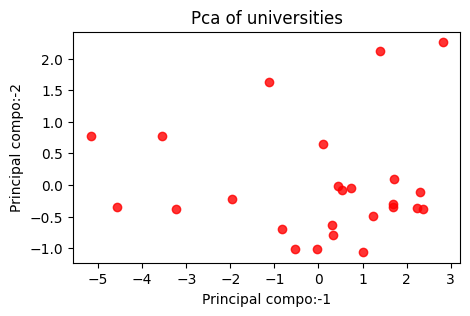

In [25]:
plt.figure(figsize=(5,3))
plt.scatter(df_pca['PC1'],df_pca['PC2'],c='r',alpha=0.8)
plt.xlabel("Principal compo:-1")
plt.ylabel("Principal compo:-2")
plt.title("Pca of universities")
plt.show()

In [26]:
print("variance explained ratio:",pca.explained_variance_ratio_)

variance explained ratio: [0.76868084 0.13113602]


In [27]:
pca.explained_variance_ratio_

array([0.76868084, 0.13113602])